In [348]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

### Fetching Flight data

In [349]:
# fetch data 

mco_syr_sw_data = pd.read_csv('flight_data/mco_syr_sw_combined.csv')
mco_syr_jb_data = pd.read_csv('flight_data/mco_syr_jb_combined.csv')
jfk_syr_jb_data = pd.read_csv('flight_data/jfk_syr_jb_combined.csv')
jfk_syr_dl_data = pd.read_csv('flight_data/jfk_syr_dl_combined.csv')
ord_syr_ua_data = pd.read_csv('flight_data/ord_syr_ua_combined.csv')
ord_syr_aa_data = pd.read_csv('flight_data/ord_syr_aa_combined.csv')

ord_syr_ua_data['dep_order'] = 'early'
jfk_syr_jb_data['dep_order'] = 'early'
mco_syr_sw_data['dep_order'] = 'early'
ord_syr_aa_data['dep_order'] = 'latter'
jfk_syr_dl_data['dep_order'] = 'latter'
mco_syr_jb_data['dep_order'] = 'latter'
#['dep_order'] = 'early'
# mco_syr_sw_data.head()
# mco_syr_jb_data.head()
# jfk_syr_jb_data.head()
# jfk_syr_dl_data.head()
# ord_syr_ua_data.head()
# ord_syr_aa_data.head()

In [350]:
dfs = [ord_syr_aa_data, ord_syr_ua_data, jfk_syr_dl_data, jfk_syr_jb_data, mco_syr_jb_data, mco_syr_sw_data]
main_data = pd.concat(dfs,axis = 0)
main_data.head()
len(main_data)

,Unnamed: 0,Carrier_Code,Date,Flight_Number,Tail_Number,Destination_Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,Wheels-on Time,Taxi-In time (Minutes),arr_Delay_Carrier,arr_Delay_Weather,arr_Delay_National_Aviation_System,arr_Delay_Security,arr_Delay_Late_Aircraft_Arrival,arr_hour,arr_day,arr_year
0,0,MQ,2020-01-04,"3,580.00",N240NN,SYR,7:55,8:21,112.00,87.00,...,10:43,5.00,0.00,0.00,0.00,0.00,0.00,10,5,2020
1,1,MQ,2020-01-11,"3,946.00",N247NN,SYR,15:00,15:09,108.00,132.00,...,18:13,8.00,9.00,0.00,24.00,0.00,0.00,17,5,2020
2,2,MQ,2020-01-18,"3,946.00",N265NN,SYR,15:00,16:27,108.00,147.00,...,19:45,9.00,0.00,4.00,39.00,0.00,83.00,17,5,2020
3,3,MQ,2020-01-25,"3,946.00",N281NN,SYR,15:00,14:55,108.00,126.00,...,17:56,5.00,0.00,0.00,0.00,0.00,0.00,17,5,2020
4,4,MQ,2020-02-01,"3,946.00",N283NN,SYR,15:00,14:57,108.00,99.00,...,17:32,4.00,0.00,0.00,0.00,0.00,0.00,17,5,2020


8661

In [351]:
main_data.dtypes
# main_data.dtypes['dep_min']



Unnamed: 0                              int64
Carrier_Code                           object
Date                                   object
Flight_Number                         float64
Tail_Number                            object
Destination_Airport                    object
Scheduled departure time               object
Actual departure time                  object
Scheduled elapsed time (Minutes)      float64
Actual elapsed time (Minutes)         float64
Departure delay (Minutes)             float64
Wheels-off time                        object
Taxi-Out time (Minutes)               float64
dep_Delay_Carrier                     float64
dep_Delay_Weather                     float64
dep_Delay_National_Aviation_System    float64
dep_Delay_Security                    float64
dep_Delay_Late_Aircraft_Arrival       float64
dep_hour                                int64
dep_day                                 int64
dep_year                                int64
dep_order                         

In [352]:

main_data['Date'] = pd.to_datetime( main_data['Date'],format ="%Y-%m-%d")
main_data['Date'] = main_data['Date'].dt.strftime('%m/%d/%Y')
main_data['dep_min'] = main_data['Scheduled departure time'].str.split(":").str[1].astype('int64')
# main_data['dep_minutes'] = main_data['dep_min'].apply(round_to_nearest_quarter).astype('object')
main_data['dep_min'] = main_data['dep_min'].astype('object')
main_data['arr_min'] = main_data['Scheduled Arrival Time'].str.split(":").str[1].astype('int64')
# main_data['arr_minutes'] = main_data['arr_min'].apply(round_to_nearest_quarter).astype('object')
main_data['arr_min'] = main_data['arr_min'].astype('object')
main_data['Flight_Number'] = main_data['Flight_Number'].astype('object')
main_data['dep_hours'] = main_data['dep_hour'].astype('object')
main_data['dep_hour'] = main_data['dep_hour'].astype('object')
main_data['dep_day'] = main_data['dep_day'].astype('object')
main_data['arr_hours'] = main_data['arr_hour'].astype('object')
main_data['arr_hour'] = main_data['arr_hour'].astype('object')
main_data['arr_day'] = main_data['arr_day'].astype('object')
conditions = [
    (main_data['Arrival Delay (Minutes)'] > 5),
    (main_data['Arrival Delay (Minutes)'] >= -5) & (main_data['Arrival Delay (Minutes)'] <= 5),
    (main_data['Arrival Delay (Minutes)'] < -5)
]
conditions2 = [
    (main_data['Departure delay (Minutes)'] > 5),
    (main_data['Departure delay (Minutes)'] >=-5) & (main_data['Departure delay (Minutes)'] <= 5),
    (main_data['Departure delay (Minutes)'] < -5)
]
choices = [2, 1, 0]
main_data['dep_status'] = np.select(conditions2, choices)

main_data['arr_status'] = np.select(conditions, choices)
main_data.dtypes
main_data.head()

Unnamed: 0                              int64
Carrier_Code                           object
Date                                   object
Flight_Number                          object
Tail_Number                            object
Destination_Airport                    object
Scheduled departure time               object
Actual departure time                  object
Scheduled elapsed time (Minutes)      float64
Actual elapsed time (Minutes)         float64
Departure delay (Minutes)             float64
Wheels-off time                        object
Taxi-Out time (Minutes)               float64
dep_Delay_Carrier                     float64
dep_Delay_Weather                     float64
dep_Delay_National_Aviation_System    float64
dep_Delay_Security                    float64
dep_Delay_Late_Aircraft_Arrival       float64
dep_hour                               object
dep_day                                object
dep_year                                int64
dep_order                         

,Unnamed: 0,Carrier_Code,Date,Flight_Number,Tail_Number,Destination_Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,arr_Delay_Late_Aircraft_Arrival,arr_hour,arr_day,arr_year,dep_min,arr_min,dep_hours,arr_hours,dep_status,arr_status
0,0,MQ,01/04/2020,"3,580.00",N240NN,SYR,7:55,8:21,112.00,87.00,...,0.00,10,5,2020,55,47,7,10,2,1
1,1,MQ,01/11/2020,"3,946.00",N247NN,SYR,15:00,15:09,108.00,132.00,...,0.00,17,5,2020,0,48,15,17,2,2
2,2,MQ,01/18/2020,"3,946.00",N265NN,SYR,15:00,16:27,108.00,147.00,...,83.00,17,5,2020,0,48,15,17,2,2
3,3,MQ,01/25/2020,"3,946.00",N281NN,SYR,15:00,14:55,108.00,126.00,...,0.00,17,5,2020,0,48,15,17,1,2
4,4,MQ,02/01/2020,"3,946.00",N283NN,SYR,15:00,14:57,108.00,99.00,...,0.00,17,5,2020,0,48,15,17,1,0


In [353]:
sub_data = main_data.drop(columns = ['Unnamed: 0','Destination_Airport','Actual departure time','Scheduled elapsed time (Minutes)','Actual elapsed time (Minutes)',
                         'Departure delay (Minutes)','Wheels-off time','Taxi-Out time (Minutes)','dep_Delay_Carrier', 'dep_year',
                         'dep_Delay_Weather','dep_Delay_National_Aviation_System','dep_Delay_Security','dep_Delay_Late_Aircraft_Arrival','Actual Arrival Time','Wheels-on Time','Taxi-In time (Minutes)','arr_Delay_Carrier','arr_Delay_Weather',
                         'arr_Delay_National_Aviation_System','arr_Delay_Security','arr_Delay_Late_Aircraft_Arrival','arr_year'])

In [354]:
sub_data.dtypes

Carrier_Code                 object
Date                         object
Flight_Number                object
Tail_Number                  object
Scheduled departure time     object
dep_hour                     object
dep_day                      object
dep_order                    object
Origin_Airport               object
Scheduled Arrival Time       object
Arrival Delay (Minutes)     float64
arr_hour                     object
arr_day                      object
dep_min                      object
arr_min                      object
dep_hours                    object
arr_hours                    object
dep_status                    int32
arr_status                    int32
dtype: object

In [355]:
sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day,dep_min,arr_min,dep_hours,arr_hours,dep_status,arr_status
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,7,5,latter,ORD,10:47,1.00,10,5,55,47,7,10,2,1
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,15,5,latter,ORD,17:48,33.00,17,5,0,48,15,17,2,2
2,MQ,01/18/2020,"3,946.00",N265NN,15:00,15,5,latter,ORD,17:48,126.00,17,5,0,48,15,17,2,2
3,MQ,01/25/2020,"3,946.00",N281NN,15:00,15,5,latter,ORD,17:48,13.00,17,5,0,48,15,17,1,2
4,MQ,02/01/2020,"3,946.00",N283NN,15:00,15,5,latter,ORD,17:48,-12.00,17,5,0,48,15,17,1,0


### Modifying flight data to have latter flights along with early flight arrival status

In [356]:
latter_data = sub_data[sub_data['dep_order'] == 'latter']
len(latter_data)

5337

In [357]:
early_data = sub_data[sub_data['dep_order'] == 'early']
len(early_data)

3324

In [358]:
# latter_data['dep_year'].value_counts()

In [359]:
# early_data['dep_year'].value_counts()

In [360]:
# latter_data['Carrier_Code'].value_counts()

In [361]:
# early_data['Carrier_Code'].value_counts()

In [362]:
merged_df = pd.merge(latter_data, early_data, on=['Date', 'Origin_Airport'], how = 'left')
merged_df.head()
len(merged_df)

,Carrier_Code_x,Date,Flight_Number_x,Tail_Number_x,Scheduled departure time_x,dep_hour_x,dep_day_x,dep_order_x,Origin_Airport,Scheduled Arrival Time_x,...,Scheduled Arrival Time_y,Arrival Delay (Minutes)_y,arr_hour_y,arr_day_y,dep_min_y,arr_min_y,dep_hours_y,arr_hours_y,dep_status_y,arr_status_y
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,7,5,latter,ORD,10:47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,15,5,latter,ORD,17:48,...,21:19,41.00,21,5,30,19,18,21,2.00,2.00
2,MQ,01/18/2020,"3,946.00",N265NN,15:00,15,5,latter,ORD,17:48,...,21:19,-2.00,21,5,30,19,18,21,2.00,1.00
3,MQ,01/25/2020,"3,946.00",N281NN,15:00,15,5,latter,ORD,17:48,...,21:19,-1.00,21,5,30,19,18,21,1.00,1.00
4,MQ,02/01/2020,"3,946.00",N283NN,15:00,15,5,latter,ORD,17:48,...,21:19,-12.00,21,5,30,19,18,21,0.00,0.00


7251

In [363]:
merged_df.head(20)

,Carrier_Code_x,Date,Flight_Number_x,Tail_Number_x,Scheduled departure time_x,dep_hour_x,dep_day_x,dep_order_x,Origin_Airport,Scheduled Arrival Time_x,...,Scheduled Arrival Time_y,Arrival Delay (Minutes)_y,arr_hour_y,arr_day_y,dep_min_y,arr_min_y,dep_hours_y,arr_hours_y,dep_status_y,arr_status_y
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,7,5,latter,ORD,10:47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,15,5,latter,ORD,17:48,...,21:19,41.00,21,5,30,19,18,21,2.00,2.00
2,MQ,01/18/2020,"3,946.00",N265NN,15:00,15,5,latter,ORD,17:48,...,21:19,-2.00,21,5,30,19,18,21,2.00,1.00
3,MQ,01/25/2020,"3,946.00",N281NN,15:00,15,5,latter,ORD,17:48,...,21:19,-1.00,21,5,30,19,18,21,1.00,1.00
4,MQ,02/01/2020,"3,946.00",N283NN,15:00,15,5,latter,ORD,17:48,...,21:19,-12.00,21,5,30,19,18,21,0.00,0.00
5,MQ,02/08/2020,"3,946.00",N274NN,15:00,15,5,latter,ORD,17:48,...,21:19,10.00,21,5,30,19,18,21,2.00,2.00
6,MQ,04/06/2020,"3,618.00",NaN,19:29,19,0,latter,ORD,22:16,...,20:48,0.00,20,0,0,48,18,20,1.00,1.00
7,MQ,04/07/2020,"3,946.00",N287NN,15:06,15,1,latter,ORD,17:53,...,20:48,-7.00,20,1,0,48,18,20,2.00,0.00
8,MQ,04/08/2020,"3,946.00",NaN,15:06,15,2,latter,ORD,17:53,...,20:48,-19.00,20,2,0,48,18,20,0.00,0.00
9,MQ,04/09/2020,"3,946.00",NaN,15:06,15,3,latter,ORD,17:53,...,20:48,-21.00,20,3,0,48,18,20,0.00,0.00


In [364]:
len(merged_df)

7251

In [365]:
merged_df.columns

Index(['Carrier_Code_x', 'Date', 'Flight_Number_x', 'Tail_Number_x',
       'Scheduled departure time_x', 'dep_hour_x', 'dep_day_x', 'dep_order_x',
       'Origin_Airport', 'Scheduled Arrival Time_x',
       'Arrival Delay (Minutes)_x', 'arr_hour_x', 'arr_day_x', 'dep_min_x',
       'arr_min_x', 'dep_hours_x', 'arr_hours_x', 'dep_status_x',
       'arr_status_x', 'Carrier_Code_y', 'Flight_Number_y', 'Tail_Number_y',
       'Scheduled departure time_y', 'dep_hour_y', 'dep_day_y', 'dep_order_y',
       'Scheduled Arrival Time_y', 'Arrival Delay (Minutes)_y', 'arr_hour_y',
       'arr_day_y', 'dep_min_y', 'arr_min_y', 'dep_hours_y', 'arr_hours_y',
       'dep_status_y', 'arr_status_y'],
      dtype='object')

### Filtering flight with a max gap of 3hrs

In [366]:
merged_df['hour_diff']= merged_df['dep_hour_x'] - merged_df['dep_hour_y']
merged_df.to_csv('mergrrr.csv')
merged_df1 = merged_df[merged_df['hour_diff'] == 0 ]
merged_df1 = merged_df1[merged_df1['dep_min_x'] > merged_df1['dep_min_y']]
merged_df2 = merged_df[(merged_df['hour_diff'] >=1) & (merged_df['hour_diff'] <= 2)]
merged_df = pd.concat([merged_df1,merged_df2])
len(merged_df)

893

In [367]:
merged_df.head()

,Carrier_Code_x,Date,Flight_Number_x,Tail_Number_x,Scheduled departure time_x,dep_hour_x,dep_day_x,dep_order_x,Origin_Airport,Scheduled Arrival Time_x,...,Arrival Delay (Minutes)_y,arr_hour_y,arr_day_y,dep_min_y,arr_min_y,dep_hours_y,arr_hours_y,dep_status_y,arr_status_y,hour_diff
869,MQ,07/04/2023,"3,402.00",N298FR,18:30,18,1,latter,ORD,21:25,...,19.00,21,1,20,14,18,21,2.00,2.00,0
870,MQ,07/05/2023,"3,402.00",N768RD,18:36,18,2,latter,ORD,21:32,...,104.00,21,2,20,14,18,21,2.00,2.00,0
873,MQ,07/06/2023,"3,402.00",N634RW,18:36,18,3,latter,ORD,21:32,...,-21.00,21,3,20,14,18,21,1.00,0.00,0
884,MQ,07/10/2023,"3,402.00",N228NN,18:36,18,0,latter,ORD,21:32,...,162.00,21,0,20,14,18,21,2.00,2.00,0
887,MQ,07/11/2023,"3,402.00",N449YX,18:36,18,1,latter,ORD,21:32,...,5.00,21,1,20,14,18,21,2.00,1.00,0


In [368]:
# merged_df['dep_year_x'].value_counts()

### correcting carrier codes

In [369]:
merged_df["Carrier_Code_x"] = np.where(merged_df["Carrier_Code_x"] == "MQ", "AA", merged_df["Carrier_Code_x"])
merged_df["Carrier_Code_x"] = np.where(merged_df["Carrier_Code_x"] == "9E", "DL", merged_df["Carrier_Code_x"])

In [370]:
merged_df.head()

,Carrier_Code_x,Date,Flight_Number_x,Tail_Number_x,Scheduled departure time_x,dep_hour_x,dep_day_x,dep_order_x,Origin_Airport,Scheduled Arrival Time_x,...,Arrival Delay (Minutes)_y,arr_hour_y,arr_day_y,dep_min_y,arr_min_y,dep_hours_y,arr_hours_y,dep_status_y,arr_status_y,hour_diff
869,AA,07/04/2023,"3,402.00",N298FR,18:30,18,1,latter,ORD,21:25,...,19.00,21,1,20,14,18,21,2.00,2.00,0
870,AA,07/05/2023,"3,402.00",N768RD,18:36,18,2,latter,ORD,21:32,...,104.00,21,2,20,14,18,21,2.00,2.00,0
873,AA,07/06/2023,"3,402.00",N634RW,18:36,18,3,latter,ORD,21:32,...,-21.00,21,3,20,14,18,21,1.00,0.00,0
884,AA,07/10/2023,"3,402.00",N228NN,18:36,18,0,latter,ORD,21:32,...,162.00,21,0,20,14,18,21,2.00,2.00,0
887,AA,07/11/2023,"3,402.00",N449YX,18:36,18,1,latter,ORD,21:32,...,5.00,21,1,20,14,18,21,2.00,1.00,0


In [371]:
merged_df.columns

Index(['Carrier_Code_x', 'Date', 'Flight_Number_x', 'Tail_Number_x',
       'Scheduled departure time_x', 'dep_hour_x', 'dep_day_x', 'dep_order_x',
       'Origin_Airport', 'Scheduled Arrival Time_x',
       'Arrival Delay (Minutes)_x', 'arr_hour_x', 'arr_day_x', 'dep_min_x',
       'arr_min_x', 'dep_hours_x', 'arr_hours_x', 'dep_status_x',
       'arr_status_x', 'Carrier_Code_y', 'Flight_Number_y', 'Tail_Number_y',
       'Scheduled departure time_y', 'dep_hour_y', 'dep_day_y', 'dep_order_y',
       'Scheduled Arrival Time_y', 'Arrival Delay (Minutes)_y', 'arr_hour_y',
       'arr_day_y', 'dep_min_y', 'arr_min_y', 'dep_hours_y', 'arr_hours_y',
       'dep_status_y', 'arr_status_y', 'hour_diff'],
      dtype='object')

In [372]:
merged_df.drop(columns=['Carrier_Code_y', 'Flight_Number_y',
       'Tail_Number_y', 'Scheduled departure time_y', 'dep_hour_y',
       'dep_day_y', 'dep_order_y', 'Scheduled Arrival Time_y',
       'Arrival Delay (Minutes)_y', 'arr_hour_y', 'arr_day_y', 'dep_min_y',
       'arr_min_y', 'dep_hours_y',
       'arr_hours_y','dep_status_y'], inplace=True)


In [373]:
merged_df.columns = merged_df.columns.str.replace('_x', '')
merged_df.rename(columns={'arr_status':'arr_status_x'}, inplace=True)

merged_df.head()
merged_df.columns

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,...,arr_hour,arr_day,dep_min,arr_min,dep_hours,arr_hours,dep_status,arr_status_x,arr_status_y,hour_diff
869,AA,07/04/2023,"3,402.00",N298FR,18:30,18,1,latter,ORD,21:25,...,21,1,30,25,18,21,0,1,2.00,0
870,AA,07/05/2023,"3,402.00",N768RD,18:36,18,2,latter,ORD,21:32,...,21,2,36,32,18,21,1,1,2.00,0
873,AA,07/06/2023,"3,402.00",N634RW,18:36,18,3,latter,ORD,21:32,...,21,3,36,32,18,21,1,0,0.00,0
884,AA,07/10/2023,"3,402.00",N228NN,18:36,18,0,latter,ORD,21:32,...,21,0,36,32,18,21,2,2,2.00,0
887,AA,07/11/2023,"3,402.00",N449YX,18:36,18,1,latter,ORD,21:32,...,21,1,36,32,18,21,2,2,1.00,0


Index(['Carrier_Code', 'Date', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time', 'dep_hour', 'dep_day', 'dep_order',
       'Origin_Airport', 'Scheduled Arrival Time', 'Arrival Delay (Minutes)',
       'arr_hour', 'arr_day', 'dep_min', 'arr_min', 'dep_hours', 'arr_hours',
       'dep_status', 'arr_status_x', 'arr_status_y', 'hour_diff'],
      dtype='object')

In [374]:
# merged_df.to_csv('flight_data\\all_lat_ear.csv')

### Fetching weather data

In [375]:
# Read and process weather data files for each airport
jfk_weather_data = pd.read_csv('weather_data/JFK_weather_data_hourly_processed.csv')
syr_weather_data = pd.read_csv('weather_data/SYR_weather_data_hourly_processed.csv')
ord_weather_data = pd.read_csv('weather_data/ORD_weather_data_hourly_processed.csv')
mco_weather_data = pd.read_csv('weather_data/MCO_weather_data_hourly_processed.csv')

# Combine weather data for all airports
weather_dfs = [jfk_weather_data, ord_weather_data, mco_weather_data]
weather_data = pd.concat(weather_dfs, axis=0)
weather_data['dep_hours'] = weather_data['dep_hours'].astype('object')
syr_weather_data['arr_hours'] = syr_weather_data['arr_hours'].astype('object')
weather_data.head()
syr_weather_data.head()
weather_data.dtypes
syr_weather_data.dtypes




,dep_azimuth,dep_clouds,dep_dewpt,dep_elev_angle,dep_h_angle,dep_precip,dep_pres,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd,Date,dep_hours,Origin_Airport
0,261.20,100,3.80,-26.20,NaN,0.00,1002,final,88,0.00,5.60,16,Overcast clouds,804,220,6.00,3.60,12/31/2019,19,JFK
1,270.50,100,3.90,-37.50,NaN,0.25,1003,final,85,0.00,6.30,16,Overcast clouds,804,220,6.80,5.37,12/31/2019,20,JFK
2,281.40,100,3.70,-48.80,NaN,0.00,1003,final,82,0.00,6.50,16,Overcast clouds,804,255,8.00,7.45,12/31/2019,21,JFK
3,296.30,100,1.60,-59.60,NaN,0.00,1002,final,73,0.00,6.10,16,Overcast clouds,804,270,9.30,6.70,12/31/2019,22,JFK
4,320.80,100,0.70,-68.60,NaN,0.00,1003,final,69,0.00,6.00,16,Overcast clouds,804,270,10.40,7.45,12/31/2019,23,JFK


,arr_azimuth,arr_clouds,arr_dewpt,arr_elev_angle,arr_h_angle,arr_precip,arr_pres,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd,Date,arr_hours
0,260.90,100,-2.30,-24.90,NaN,0.00,987,final,78,0.00,1.10,14,Overcast clouds,804,240,9.60,4.59,12/31/2019,19
1,270.70,100,-3.00,-35.80,NaN,0.00,987,final,77,0.00,0.60,16,Overcast clouds,804,240,9.60,4.59,12/31/2019,20
2,282.10,100,-4.00,-46.60,NaN,0.00,986,final,71,0.00,0.60,16,Overcast clouds,804,240,10.40,5.70,12/31/2019,21
3,297.00,100,-4.40,-56.90,NaN,0.00,987,final,69,0.00,0.60,16,Overcast clouds,804,250,10.40,6.20,12/31/2019,22
4,319.80,100,-4.40,-65.60,NaN,0.00,986,final,69,0.00,0.60,14,Overcast clouds,804,250,10.80,6.20,12/31/2019,23


dep_azimuth                float64
dep_clouds                   int64
dep_dewpt                  float64
dep_elev_angle             float64
dep_h_angle                float64
dep_precip                 float64
dep_pres                     int64
dep_revision_status         object
dep_rh                       int64
dep_snow                   float64
dep_temp                   float64
dep_vis                      int64
dep_weather.description     object
dep_weather.code             int64
dep_wind_dir                 int64
dep_wind_gust_spd          float64
dep_wind_spd               float64
Date                        object
dep_hours                   object
Origin_Airport              object
dtype: object

arr_azimuth                float64
arr_clouds                   int64
arr_dewpt                  float64
arr_elev_angle             float64
arr_h_angle                float64
arr_precip                 float64
arr_pres                     int64
arr_revision_status         object
arr_rh                       int64
arr_snow                   float64
arr_temp                   float64
arr_vis                      int64
arr_weather.description     object
arr_weather.code             int64
arr_wind_dir                 int64
arr_wind_gust_spd          float64
arr_wind_spd               float64
Date                        object
arr_hours                   object
dtype: object

In [376]:
# Define merging logic based on airport code
merged_df = pd.merge(merged_df, syr_weather_data, how='left', on=['Date', 'arr_hours'])
merged_df.head()



,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,...,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,AA,07/04/2023,"3,402.00",N298FR,18:30,18,1,latter,ORD,21:25,...,final,68,0.00,24.40,13,Broken clouds,803,325,2.00,1.20
1,AA,07/05/2023,"3,402.00",N768RD,18:36,18,2,latter,ORD,21:32,...,final,62,0.00,25.60,16,Scattered clouds,802,70,0.80,0.80
2,AA,07/06/2023,"3,402.00",N634RW,18:36,18,3,latter,ORD,21:32,...,final,62,0.00,26.70,16,Overcast clouds,804,300,3.20,2.60
3,AA,07/10/2023,"3,402.00",N228NN,18:36,18,0,latter,ORD,21:32,...,final,86,0.00,17.80,16,Overcast clouds,804,190,2.80,1.50
4,AA,07/11/2023,"3,402.00",N449YX,18:36,18,1,latter,ORD,21:32,...,final,61,0.00,25.00,16,Overcast clouds,804,320,2.80,1.50


In [377]:
merged_df = pd.merge(merged_df, weather_data, how='left', on=['Origin_Airport', 'Date', 'dep_hours'])


merged_df.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,...,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,AA,07/04/2023,"3,402.00",N298FR,18:30,18,1,latter,ORD,21:25,...,final,54,0.00,30.10,16,Overcast clouds,804,280,5.20,3.45
1,AA,07/05/2023,"3,402.00",N768RD,18:36,18,2,latter,ORD,21:32,...,final,79,0.00,26.10,16,Thunderstorm with heavy rain,202,290,10.30,5.70
2,AA,07/06/2023,"3,402.00",N634RW,18:36,18,3,latter,ORD,21:32,...,final,55,0.00,24.70,16,Overcast clouds,804,65,6.00,3.97
3,AA,07/10/2023,"3,402.00",N228NN,18:36,18,0,latter,ORD,21:32,...,final,43,0.00,29.10,16,Broken clouds,803,210,9.60,5.30
4,AA,07/11/2023,"3,402.00",N449YX,18:36,18,1,latter,ORD,21:32,...,final,68,0.00,21.80,16,Broken clouds,803,70,6.40,3.10


In [378]:
# merged_df.to_csv('flight_data\\all_lat_ear.csv')

In [379]:
merged_df.drop(columns= ['Date', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time','Carrier_Code',
       'dep_order', 'Scheduled Arrival Time',
       'Arrival Delay (Minutes)','hour_diff','arr_weather.description','dep_weather.description'],inplace = True)

merged_df.dtypes

dep_hour                object
dep_day                 object
Origin_Airport          object
arr_hour                object
arr_day                 object
dep_min                 object
arr_min                 object
dep_hours               object
arr_hours               object
dep_status               int32
arr_status_x             int32
arr_status_y           float64
arr_azimuth            float64
arr_clouds               int64
arr_dewpt              float64
arr_elev_angle         float64
arr_h_angle            float64
arr_precip             float64
arr_pres                 int64
arr_revision_status     object
arr_rh                   int64
arr_snow               float64
arr_temp               float64
arr_vis                  int64
arr_weather.code         int64
arr_wind_dir             int64
arr_wind_gust_spd      float64
arr_wind_spd           float64
dep_azimuth            float64
dep_clouds               int64
dep_dewpt              float64
dep_elev_angle         float64
dep_h_an

In [380]:
merged_df['dep_status'] = merged_df['dep_status'].astype('int64').astype('object')
merged_df['arr_status_y'] = merged_df['arr_status_y'].astype('int64').astype('object')
merged_df.head()
merged_df.dtypes
su_data = merged_df

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_hours,arr_hours,dep_status,...,dep_pres,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,18,1,ORD,21,1,30,25,18,21,0,...,989,final,54,0.00,30.10,16,804,280,5.20,3.45
1,18,2,ORD,21,2,36,32,18,21,1,...,986,final,79,0.00,26.10,16,202,290,10.30,5.70
2,18,3,ORD,21,3,36,32,18,21,1,...,989,final,55,0.00,24.70,16,804,65,6.00,3.97
3,18,0,ORD,21,0,36,32,18,21,2,...,987,final,43,0.00,29.10,16,803,210,9.60,5.30
4,18,1,ORD,21,1,36,32,18,21,2,...,989,final,68,0.00,21.80,16,803,70,6.40,3.10


dep_hour                object
dep_day                 object
Origin_Airport          object
arr_hour                object
arr_day                 object
dep_min                 object
arr_min                 object
dep_hours               object
arr_hours               object
dep_status              object
arr_status_x             int32
arr_status_y            object
arr_azimuth            float64
arr_clouds               int64
arr_dewpt              float64
arr_elev_angle         float64
arr_h_angle            float64
arr_precip             float64
arr_pres                 int64
arr_revision_status     object
arr_rh                   int64
arr_snow               float64
arr_temp               float64
arr_vis                  int64
arr_weather.code         int64
arr_wind_dir             int64
arr_wind_gust_spd      float64
arr_wind_spd           float64
dep_azimuth            float64
dep_clouds               int64
dep_dewpt              float64
dep_elev_angle         float64
dep_h_an

In [381]:
# su_data = sub_data.drop(columns = ['dep_order'])
su_data.head()

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_hours,arr_hours,dep_status,...,dep_pres,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,18,1,ORD,21,1,30,25,18,21,0,...,989,final,54,0.00,30.10,16,804,280,5.20,3.45
1,18,2,ORD,21,2,36,32,18,21,1,...,986,final,79,0.00,26.10,16,202,290,10.30,5.70
2,18,3,ORD,21,3,36,32,18,21,1,...,989,final,55,0.00,24.70,16,804,65,6.00,3.97
3,18,0,ORD,21,0,36,32,18,21,2,...,987,final,43,0.00,29.10,16,803,210,9.60,5.30
4,18,1,ORD,21,1,36,32,18,21,2,...,989,final,68,0.00,21.80,16,803,70,6.40,3.10


In [382]:
su_data.columns
su_data.head()

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_hours', 'arr_hours', 'dep_status',
       'arr_status_x', 'arr_status_y', 'arr_azimuth', 'arr_clouds',
       'arr_dewpt', 'arr_elev_angle', 'arr_h_angle', 'arr_precip', 'arr_pres',
       'arr_revision_status', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_azimuth', 'dep_clouds', 'dep_dewpt', 'dep_elev_angle',
       'dep_h_angle', 'dep_precip', 'dep_pres', 'dep_revision_status',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code',
       'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_hours,arr_hours,dep_status,...,dep_pres,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,18,1,ORD,21,1,30,25,18,21,0,...,989,final,54,0.00,30.10,16,804,280,5.20,3.45
1,18,2,ORD,21,2,36,32,18,21,1,...,986,final,79,0.00,26.10,16,202,290,10.30,5.70
2,18,3,ORD,21,3,36,32,18,21,1,...,989,final,55,0.00,24.70,16,804,65,6.00,3.97
3,18,0,ORD,21,0,36,32,18,21,2,...,987,final,43,0.00,29.10,16,803,210,9.60,5.30
4,18,1,ORD,21,1,36,32,18,21,2,...,989,final,68,0.00,21.80,16,803,70,6.40,3.10


In [383]:

su_data['dep_hour'] = pd.Categorical(su_data['dep_hour'], categories=[i for i in range(24)])
su_data['dep_day'] = pd.Categorical(su_data['dep_day'], categories=[i for i in range(7)])
su_data['dep_min'] = pd.Categorical(su_data['dep_min'], categories=[i for i in range(60)])
su_data['arr_hour'] = pd.Categorical(su_data['arr_hour'], categories=[i for i in range(24)])
su_data['arr_day'] = pd.Categorical(su_data['arr_day'], categories=[i for i in range(7)])
su_data['arr_min'] = pd.Categorical(su_data['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'DL', 'B6'])
su_data['Origin_Airport'] = pd.Categorical(su_data['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
su_data['arr_weather.code'] = pd.Categorical(su_data['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
su_data['dep_weather.code'] = pd.Categorical(su_data['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
su_data['dep_status']= pd.Categorical(su_data['dep_status'], categories = [0,1,2])
su_data.drop(columns=['dep_hours', 'arr_hours'],inplace = True)
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'arr_status_x', 'arr_status_y',
       'arr_azimuth', 'arr_clouds', 'arr_dewpt', 'arr_elev_angle',
       'arr_h_angle', 'arr_precip', 'arr_pres', 'arr_revision_status',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd', 'dep_azimuth',
       'dep_clouds', 'dep_dewpt', 'dep_elev_angle', 'dep_h_angle',
       'dep_precip', 'dep_pres', 'dep_revision_status', 'dep_rh', 'dep_snow',
       'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

In [384]:
su_data.isna().sum()

dep_hour                 0
dep_day                  0
Origin_Airport           0
arr_hour                 0
arr_day                  0
dep_min                  0
arr_min                  0
dep_status               0
arr_status_x             0
arr_status_y             0
arr_azimuth              0
arr_clouds               0
arr_dewpt                0
arr_elev_angle           0
arr_h_angle            893
arr_precip               0
arr_pres                 0
arr_revision_status      0
arr_rh                   0
arr_snow                 0
arr_temp                 0
arr_vis                  0
arr_weather.code         8
arr_wind_dir             0
arr_wind_gust_spd        0
arr_wind_spd             0
dep_azimuth              0
dep_clouds               0
dep_dewpt                0
dep_elev_angle           0
dep_h_angle            893
dep_precip               0
dep_pres                 0
dep_revision_status      0
dep_rh                   0
dep_snow                 0
dep_temp                 0
d

In [385]:
su_data.drop(columns=['arr_h_angle','dep_h_angle', 'arr_azimuth', 'dep_azimuth', 'arr_elev_angle', 'dep_elev_angle', 'arr_revision_status', 'dep_revision_status'],inplace = True)
su_data.dropna(inplace=True)

# sub_data.drop(columns= ['Carrier_Code','Date','Flight_Number','Tail_Number','arr_azimuth',
#                        'Scheduled departure time','Scheduled Arrival Time','dep_order', 
#                         'arr_hours', 'dep_hours',
#                         'arr_weather.description', 'dep_weather.description','arr_delay','Departure delay (Minutes)',
#                        'arr_elev_angle','arr_h_angle','arr_revision_status',
#                        'dep_elev_angle','dep_h_angle','dep_revision_status','dep_azimuth'],inplace = True)


In [386]:
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'arr_status_x', 'arr_status_y',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd'],
      dtype='object')

### Training model to predict latter flight arrival status

In [387]:
su_data = pd.get_dummies(su_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
su_data.head()
su_data.dtypes

,arr_status_x,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
0,1,50,18.10,0.00,999,68,0.00,24.40,13,325,...,False,False,False,False,False,False,False,False,True,False
1,1,25,17.80,0.00,999,62,0.00,25.60,16,70,...,False,False,False,False,False,False,False,False,False,False
2,0,87,18.80,0.00,995,62,0.00,26.70,16,300,...,False,False,False,False,False,False,False,False,True,False
3,2,87,15.40,0.00,995,86,0.00,17.80,16,190,...,False,False,False,False,False,False,False,True,False,False
4,2,87,17.00,0.00,996,61,0.00,25.00,16,320,...,False,False,False,False,False,False,False,True,False,False


arr_status_x              int32
arr_clouds                int64
arr_dewpt               float64
arr_precip              float64
arr_pres                  int64
                         ...   
dep_weather.code_801       bool
dep_weather.code_802       bool
dep_weather.code_803       bool
dep_weather.code_804       bool
dep_weather.code_900       bool
Length: 275, dtype: object

In [388]:
X_train, X_test, y_train, y_test = train_test_split(su_data.drop(columns = ['arr_status_x']), su_data['arr_status_x'], test_size=0.2, stratify = su_data['arr_status_x'], random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
333,50,-5.70,0.00,995,71,0.00,-1.10,16,90,2.80,...,False,False,False,False,False,False,False,True,False,False
178,87,5.40,0.00,1009,49,0.00,16.10,16,300,7.20,...,False,False,False,False,False,False,False,False,True,False
281,50,17.20,0.00,995,87,0.00,19.40,16,220,3.20,...,False,False,False,False,False,False,False,True,False,False
297,87,13.80,0.00,998,83,0.00,16.70,16,190,6.00,...,False,False,False,False,False,False,True,False,False,False
278,25,18.30,0.00,1006,81,0.00,21.70,16,35,2.80,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,50,-7.40,0.00,1007,49,0.00,2.20,16,90,4.40,...,False,False,False,False,True,False,False,False,False,False
370,100,19.40,0.00,988,84,0.00,22.20,16,285,8.40,...,False,False,False,False,False,False,False,False,True,False
440,100,11.70,0.00,985,100,0.00,11.70,10,250,7.60,...,False,False,False,False,False,False,False,True,False,False
694,100,11.10,0.25,988,83,0.00,13.90,11,140,10.00,...,False,False,False,False,False,False,False,False,True,False


,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
711,100,8.10,0.00,1006,66,0.00,14.40,16,50,4.00,...,False,False,False,False,False,False,False,False,True,False
668,25,8.90,0.00,1007,80,0.00,12.20,16,135,2.40,...,False,False,False,False,False,False,False,True,False,False
821,100,1.00,0.00,999,85,0.00,3.30,10,300,9.20,...,False,False,False,False,False,False,False,False,True,False
422,100,5.50,0.00,1004,92,0.00,6.70,8,80,7.60,...,False,False,False,False,False,False,False,True,False,False
639,100,18.30,0.00,996,81,0.00,21.70,16,240,4.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,87,-12.30,0.00,1008,39,0.00,0.00,16,170,9.80,...,False,False,False,False,False,False,True,False,False,False
644,87,11.10,0.00,998,72,0.00,16.10,16,340,8.00,...,False,False,False,False,False,False,True,False,False,False
208,50,-5.00,0.00,1002,72,0.00,-0.60,16,210,9.30,...,False,False,False,False,False,False,False,True,False,False
465,100,-4.40,0.00,1010,78,0.00,-1.10,16,160,2.80,...,False,False,False,False,False,False,False,False,True,False


dtype('int32')

711    1
668    2
821    1
422    1
639    0
      ..
837    1
644    0
208    2
465    0
835    2
Name: arr_status_x, Length: 177, dtype: int32

In [389]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
333,-0.77,-1.38,-0.20,-0.67,0.17,-0.08,-1.51,0.40,-1.21,-1.15,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,2.31,-1.00,0.00
178,0.39,-0.05,-0.20,1.10,-1.06,-0.08,0.45,0.40,1.17,0.17,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,-0.43,1.00,0.00
281,-0.77,1.37,-0.20,-0.67,1.06,-0.08,0.83,0.40,0.26,-1.03,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,2.31,-1.00,0.00
297,0.39,0.96,-0.20,-0.29,0.84,-0.08,0.52,0.40,-0.08,-0.19,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,2.07,-0.43,-1.00,0.00
278,-1.56,1.50,-0.20,0.72,0.73,-0.08,1.09,0.40,-1.83,-1.15,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,2.31,-1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,-0.77,-1.58,-0.20,0.84,-1.06,-0.08,-1.14,0.40,-1.21,-0.67,...,-0.09,0.00,-0.17,0.00,4.67,-0.16,-0.48,-0.43,-1.00,0.00
370,0.80,1.63,-0.20,-1.56,0.89,-0.08,1.15,0.40,1.00,0.53,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,-0.43,1.00,0.00
440,0.80,0.71,-0.20,-1.94,1.79,-0.08,-0.05,-1.59,0.60,0.29,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,2.31,-1.00,0.00
694,0.80,0.64,0.06,-1.56,0.84,-0.08,0.20,-1.26,-0.65,1.01,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,-0.43,1.00,0.00


,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
711,0.80,0.28,-0.20,0.72,-0.11,-0.08,0.25,0.40,-1.66,-0.79,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,-0.43,1.00,0.00
668,-1.56,0.37,-0.20,0.84,0.67,-0.08,0.00,0.40,-0.70,-1.27,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,2.31,-1.00,0.00
821,0.80,-0.58,-0.20,-0.17,0.95,-0.08,-1.01,-1.59,1.17,0.77,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,-0.43,1.00,0.00
422,0.80,-0.04,-0.20,0.46,1.34,-0.08,-0.62,-2.26,-1.32,0.29,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,2.31,-1.00,0.00
639,0.80,1.50,-0.20,-0.55,0.73,-0.08,1.09,0.40,0.49,-0.67,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,2.31,-1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,0.39,-2.17,-0.20,0.97,-1.62,-0.08,-1.39,0.40,-0.31,0.95,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,2.07,-0.43,-1.00,0.00
644,0.39,0.64,-0.20,-0.29,0.22,-0.08,0.45,0.40,1.62,0.41,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,2.07,-0.43,-1.00,0.00
208,-0.77,-1.30,-0.20,0.21,0.22,-0.08,-1.46,0.40,0.15,0.80,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,2.31,-1.00,0.00
465,0.80,-1.22,-0.20,1.22,0.56,-0.08,-1.51,0.40,-0.42,-1.15,...,-0.09,0.00,-0.17,0.00,-0.21,-0.16,-0.48,-0.43,1.00,0.00


333    2
178    2
281    2
297    2
278    2
      ..
506    0
370    2
440    0
694    1
86     0
Name: arr_status_x, Length: 708, dtype: int32

711    1
668    2
821    1
422    1
639    0
      ..
837    1
644    0
208    2
465    0
835    2
Name: arr_status_x, Length: 177, dtype: int32

In [390]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
# model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
arr_model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
# model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

arr_model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
arr_model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
arr_model.coef_

# This is the coefficient Beta_0
arr_model.intercept_

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty=None)

0.7923728813559322

array([[ 1.29280052e-01,  1.32796279e-01, -6.13515111e-01,
        -4.50766566e-01, -4.39669637e-01,  9.24214261e-01,
        -6.52567535e-01, -3.45689772e-03, -2.78787219e-02,
        -2.65744884e-01,  1.86269727e-02, -3.81693431e-01,
        -6.17261706e-01, -1.33885087e+00,  8.75582511e-01,
         4.82310616e-01,  4.19044845e-01,  1.33250004e+00,
         4.40166195e-02, -7.71236255e-02, -2.24200002e-01,
         1.63315266e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         8.12742815e-01,  1.16339902e-01,  2.59191288e-01,
         1.74954532e-01, -4.71680467e-02,  9.24971965e-01,
         1.44914652e-01,  0.00000000e+00,  0.00000000e+00,
         2.51314626e-01, -5.97610984e-01,  1.03478642e+00,
         5.89011818e-01, -1.63670977e+00, -8.24873918e-01,
         1.19386953e-01,  8.48055386e-03, -1.82127190e-02,
        -1.77553112e-02,  1.20704549e-02,  8.66018941e-0

array([ 0.78860129, -0.21738158, -0.57121971])

In [391]:
arr_model.score(X_test,y_test)

0.6045197740112994

In [392]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
arr_clf = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

arr_clf = clf.fit(X_train, y_train) 
arr_clf.score(X_train, y_train)

arr_clf.feature_importances_
arr_clf_output = pd.DataFrame(arr_clf.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
arr_clf_output.head()
arr_clf.score(X_test, y_test)

0.8940677966101694

array([0.        , 0.02787978, 0.00563367, 0.01607327, 0.02078145,
       0.        , 0.02189077, 0.01564084, 0.05533383, 0.02991479,
       0.01404978, 0.00269427, 0.02301926, 0.013263  , 0.10437207,
       0.04703959, 0.        , 0.0254579 , 0.        , 0.05274309,
       0.0089314 , 0.07239871, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00416413, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01576733, 0.        ,
       0.        , 0.        , 0.01060994, 0.        , 0.        ,
       0.        , 0.        , 0.00729505, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00475072, 0.     

,pred_arr_status
711,1
668,2
821,0
422,1
639,0


0.5254237288135594

0.788135593220339

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_status_2         0.18
dep_pres             0.06
dep_status_1         0.05
dep_temp             0.05
dep_wind_gust_spd    0.04
dep_dewpt            0.04
arr_dewpt            0.04
arr_rh               0.04
Origin_Airport_JFK   0.03
dep_wind_spd         0.03
arr_temp             0.03
dep_clouds           0.03
dtype: float64

,pred_Y
711,0
668,2
821,1
422,0
639,0


,pred_Y,arr_status_x
711,0,1
668,2,2
821,1,1
422,0,1
639,0,0


Fraction of correct classification 


0.6610169491525424

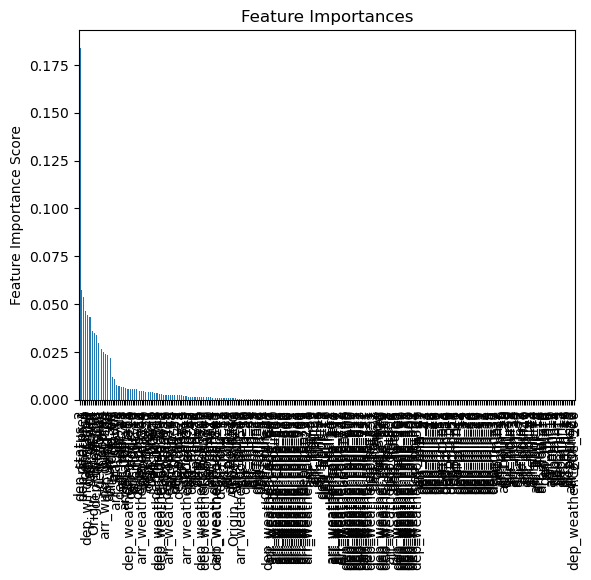

<Figure size 2000x1000 with 0 Axes>

In [393]:

from sklearn.ensemble import RandomForestClassifier
arr_rf = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

arr_rf = arr_rf.fit(X_train, y_train) 
arr_rf.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(arr_rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

arr_rf_output = pd.DataFrame(arr_rf.predict(X_test), index = X_test.index, columns = ['pred_Y'])

arr_rf_output.head()
arr_rf_output = arr_rf_output.merge(y_test, left_index = True, right_index = True)
arr_rf_output.head()
print('Fraction of correct classification ')
arr_rf.score(X_test, y_test) 

In [394]:

from sklearn.ensemble import GradientBoostingClassifier
arr_gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

arr_gb = arr_gb.fit(X_train, y_train) 
arr_gb.score(X_train, y_train) 

1.0

In [395]:
arr_gb.score(X_test,y_test)

0.6384180790960452

### preprocessing data to predict departure status

In [396]:
sub_data.columns
sub_data.head()

Index(['Carrier_Code', 'Date', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time', 'dep_hour', 'dep_day', 'dep_order',
       'Origin_Airport', 'Scheduled Arrival Time', 'Arrival Delay (Minutes)',
       'arr_hour', 'arr_day', 'dep_min', 'arr_min', 'dep_hours', 'arr_hours',
       'dep_status', 'arr_status'],
      dtype='object')

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day,dep_min,arr_min,dep_hours,arr_hours,dep_status,arr_status
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,7,5,latter,ORD,10:47,1.00,10,5,55,47,7,10,2,1
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,15,5,latter,ORD,17:48,33.00,17,5,0,48,15,17,2,2
2,MQ,01/18/2020,"3,946.00",N265NN,15:00,15,5,latter,ORD,17:48,126.00,17,5,0,48,15,17,2,2
3,MQ,01/25/2020,"3,946.00",N281NN,15:00,15,5,latter,ORD,17:48,13.00,17,5,0,48,15,17,1,2
4,MQ,02/01/2020,"3,946.00",N283NN,15:00,15,5,latter,ORD,17:48,-12.00,17,5,0,48,15,17,1,0


In [397]:
sub_data.dtypes

Carrier_Code                 object
Date                         object
Flight_Number                object
Tail_Number                  object
Scheduled departure time     object
dep_hour                     object
dep_day                      object
dep_order                    object
Origin_Airport               object
Scheduled Arrival Time       object
Arrival Delay (Minutes)     float64
arr_hour                     object
arr_day                      object
dep_min                      object
arr_min                      object
dep_hours                    object
arr_hours                    object
dep_status                    int32
arr_status                    int32
dtype: object

In [398]:
s_data = sub_data.drop(columns=['Carrier_Code', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time', 'dep_order', 'Scheduled Arrival Time', 'Arrival Delay (Minutes)',
        'arr_status'])

In [399]:
s_data.columns


Index(['Date', 'dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_hours', 'arr_hours', 'dep_status'],
      dtype='object')

In [400]:
s_data = pd.merge(s_data, weather_data, how='left', on=['Origin_Airport', 'Date', 'dep_hours'])


s_data.head()

,Date,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_hours,arr_hours,...,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,01/04/2020,7,5,ORD,10,5,55,47,7,10,...,final,88,0.00,-1.10,11,Overcast clouds,804,320,6.80,3.10
1,01/11/2020,15,5,ORD,17,5,0,48,15,17,...,final,96,8.50,-0.60,2,Light snow,600,20,15.90,10.80
2,01/18/2020,15,5,ORD,17,5,0,48,15,17,...,final,86,6.25,-4.80,14,Flurries,623,250,16.80,11.17
3,01/25/2020,15,5,ORD,17,5,0,48,15,17,...,final,92,4.00,0.80,6,Light snow,600,255,8.20,4.34
4,02/01/2020,15,5,ORD,17,5,0,48,15,17,...,final,73,0.00,2.40,16,Overcast clouds,804,255,10.40,5.37


In [401]:
# Define merging logic based on airport code
s_data = pd.merge(s_data, syr_weather_data, how='left', on=['Date', 'arr_hours'])
s_data.head()



,Date,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_hours,arr_hours,...,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,01/04/2020,7,5,ORD,10,5,55,47,7,10,...,final,92,0.00,2.80,6,Light rain,500,350,5.09,5.09
1,01/11/2020,15,5,ORD,17,5,0,48,15,17,...,final,83,0.00,15.00,16,Light rain,500,150,11.50,2.10
2,01/18/2020,15,5,ORD,17,5,0,48,15,17,...,final,84,20.00,-3.90,0,Light snow,600,110,9.80,4.09
3,01/25/2020,15,5,ORD,17,5,0,48,15,17,...,final,96,1.50,1.10,3,Sleet,611,110,2.60,2.60
4,02/01/2020,15,5,ORD,17,5,0,48,15,17,...,final,75,0.00,0.00,16,Overcast clouds,804,245,1.60,0.80


In [402]:
s_data.columns

Index(['Date', 'dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_hours', 'arr_hours', 'dep_status',
       'dep_azimuth', 'dep_clouds', 'dep_dewpt', 'dep_elev_angle',
       'dep_h_angle', 'dep_precip', 'dep_pres', 'dep_revision_status',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.description',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_azimuth', 'arr_clouds', 'arr_dewpt', 'arr_elev_angle',
       'arr_h_angle', 'arr_precip', 'arr_pres', 'arr_revision_status',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.description',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
       'arr_wind_spd'],
      dtype='object')

In [403]:
s_data.drop(columns= ['Date','arr_azimuth',
                        'arr_hours', 'dep_hours', 
                        'arr_weather.description', 'dep_weather.description'
                        ,'arr_elev_angle','arr_h_angle','arr_revision_status',
                       'dep_elev_angle','dep_h_angle','dep_revision_status','dep_azimuth'],inplace = True)
s_data.columns


Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [404]:

s_data.dtypes
s_data.columns

s_data.head()
s_data.isna().sum()

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
dep_status             int32
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres               int64
dep_rh                 int64
dep_snow             float64
dep_temp             float64
dep_vis                int64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres               int64
arr_rh                 int64
arr_snow             float64
arr_temp             float64
arr_vis                int64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dtype: object

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_status,dep_clouds,dep_dewpt,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,7,5,ORD,10,5,55,47,2,100,-2.80,...,1.50,991,92,0.00,2.80,6,500,350,5.09,5.09
1,15,5,ORD,17,5,0,48,2,100,-1.20,...,1.50,994,83,0.00,15.00,16,500,150,11.50,2.10
2,15,5,ORD,17,5,0,48,2,100,-6.80,...,1.00,994,84,20.00,-3.90,0,600,110,9.80,4.09
3,15,5,ORD,17,5,0,48,1,100,-0.30,...,1.50,994,96,1.50,1.10,3,611,110,2.60,2.60
4,15,5,ORD,17,5,0,48,1,100,-2.00,...,0.00,994,75,0.00,0.00,16,804,245,1.60,0.80


dep_hour             0
dep_day              0
Origin_Airport       0
arr_hour             0
arr_day              0
dep_min              0
arr_min              0
dep_status           0
dep_clouds           0
dep_dewpt            0
dep_precip           0
dep_pres             0
dep_rh               0
dep_snow             0
dep_temp             0
dep_vis              0
dep_weather.code     0
dep_wind_dir         0
dep_wind_gust_spd    0
dep_wind_spd         0
arr_clouds           0
arr_dewpt            0
arr_precip           0
arr_pres             0
arr_rh               0
arr_snow             0
arr_temp             0
arr_vis              0
arr_weather.code     0
arr_wind_dir         0
arr_wind_gust_spd    0
arr_wind_spd         0
dtype: int64

In [405]:
su_data = s_data
# su_data.head()
# sub_data.columns
su_data['dep_hour'] = pd.Categorical(su_data['dep_hour'], categories=[i for i in range(24)])
su_data['dep_day'] = pd.Categorical(su_data['dep_day'], categories=[i for i in range(7)])
su_data['dep_min'] = pd.Categorical(su_data['dep_min'], categories=[i for i in range(60)])
su_data['arr_hour'] = pd.Categorical(su_data['arr_hour'], categories=[i for i in range(24)])
su_data['arr_day'] = pd.Categorical(su_data['arr_day'], categories=[i for i in range(7)])
su_data['arr_min'] = pd.Categorical(su_data['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
su_data['Origin_Airport'] = pd.Categorical(su_data['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
su_data['arr_weather.code'] = pd.Categorical(su_data['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
su_data['dep_weather.code'] = pd.Categorical(su_data['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
#su_data['dep_status']= pd.Categorical(su_data['dep_status'], categories = [0,1,2])
#su_data.drop(columns=['arr_h_angle','dep_h_angle'],inplace = True)
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [406]:
su_data['dep_precip'] = su_data['dep_precip']**2
su_data['arr_precip'] = su_data['arr_precip']**2

### Traning model to predict depature status

In [407]:
dep_data = pd.get_dummies(su_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
dep_data.head()
# su_data.dtypes
# su_data.columns

,dep_status,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,2,100,-2.80,0.00,989,88,0.00,-1.10,11,320,...,False,False,False,False,False,False,False,False,False,False
1,2,100,-1.20,0.25,985,96,8.50,-0.60,2,20,...,False,False,False,False,False,False,False,False,False,False
2,2,100,-6.80,0.06,983,86,6.25,-4.80,14,250,...,False,False,False,False,False,False,False,False,False,False
3,1,100,-0.30,0.25,985,92,4.00,0.80,6,255,...,False,False,False,False,False,False,False,False,False,False
4,1,100,-2.00,0.00,984,73,0.00,2.40,16,255,...,False,False,False,False,False,False,False,False,True,False


In [408]:
X_train, X_test, y_train, y_test = train_test_split(dep_data.drop(columns = ['dep_status']), dep_data['dep_status'],stratify = dep_data['dep_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
940,87,18.20,0.00,984,66,0.00,25.00,16,250,2.80,...,False,False,False,False,False,False,False,False,True,False
8173,87,20.60,0.00,1007,63,0.00,28.30,16,60,9.80,...,False,False,False,False,False,False,False,True,False,False
7040,87,3.50,0.00,1002,44,0.00,15.70,16,295,13.90,...,False,False,False,False,False,False,False,False,False,False
5583,87,11.00,0.00,1007,74,0.00,15.60,16,170,10.80,...,False,False,False,False,False,False,False,False,True,False
425,0,-1.70,0.00,1000,63,0.00,4.70,16,210,4.00,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,78,13.50,0.00,1021,57,0.00,22.50,16,245,4.80,...,False,False,False,False,False,False,False,True,False,False
6597,87,3.80,0.00,1005,28,0.00,23.30,16,215,10.00,...,False,False,False,False,False,False,False,False,True,False
7866,25,12.60,0.00,1015,46,0.00,25.00,16,230,8.80,...,False,False,True,False,False,False,False,False,False,False
1419,87,-3.80,0.00,985,42,0.00,8.30,16,185,6.40,...,False,False,False,False,False,False,True,False,False,False


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4600,25,17.70,0.00,1006,60,0.00,26.10,16,310,4.72,...,False,False,False,False,False,False,False,False,False,False
5412,50,5.60,0.06,1031,86,0.00,7.80,16,170,7.20,...,False,False,False,False,False,False,False,False,True,False
6801,87,16.80,0.00,1015,72,0.00,22.10,16,100,3.60,...,False,False,False,False,False,False,False,False,True,False
6567,31,6.10,0.00,1022,41,0.00,19.70,16,315,7.70,...,False,False,False,False,False,False,False,True,False,False
3051,100,10.40,4.00,1004,92,0.00,11.70,5,120,7.20,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,96,11.90,0.00,1014,86,0.00,14.30,4,95,6.00,...,False,False,False,False,False,False,False,False,True,False
8534,50,24.20,0.00,1010,81,0.00,27.80,16,260,8.20,...,False,False,False,False,False,False,False,True,False,False
2115,25,-2.10,0.00,1000,22,0.00,20.30,16,45,7.60,...,False,False,False,False,False,False,True,False,False,False
7381,87,15.50,0.00,1012,66,0.00,22.20,16,140,4.00,...,False,False,False,False,False,False,False,False,True,False


dtype('int32')

4600    2
5412    2
6801    2
6567    2
3051    2
       ..
4135    1
8534    1
2115    2
7381    0
2537    1
Name: dep_status, Length: 1733, dtype: int32

In [409]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_train = pd.DataFrame(sc1.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc1.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
940,0.63,1.02,-0.08,-1.77,0.16,-0.06,0.96,0.31,0.57,-1.45,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
8173,0.63,1.26,-0.08,-0.06,0.00,-0.06,1.30,0.31,-1.38,0.64,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,2.48,-1.21,0.00
7040,0.63,-0.44,-0.08,-0.43,-1.00,-0.06,0.01,0.31,1.03,1.86,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
5583,0.63,0.31,-0.08,-0.06,0.58,-0.06,0.00,0.31,-0.25,0.93,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
425,-2.16,-0.95,-0.08,-0.58,0.00,-0.06,-1.12,0.31,0.16,-1.10,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.34,0.56,-0.08,0.98,-0.32,-0.06,0.71,0.31,0.51,-0.86,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,2.48,-1.21,0.00
6597,0.63,-0.41,-0.08,-0.21,-1.85,-0.06,0.79,0.31,0.21,0.70,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
7866,-1.36,0.47,-0.08,0.54,-0.90,-0.06,0.96,0.31,0.36,0.34,...,-0.09,0.00,14.24,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
1419,0.63,-1.16,-0.08,-1.70,-1.11,-0.06,-0.75,0.31,-0.10,-0.38,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.60,-0.40,-1.21,0.00


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4600,-1.36,0.98,-0.08,-0.13,-0.16,-0.06,1.08,0.31,1.18,-0.88,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
5412,-0.56,-0.23,-0.07,1.73,1.22,-0.06,-0.80,0.31,-0.25,-0.14,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
6801,0.63,0.89,-0.08,0.54,0.48,-0.06,0.67,0.31,-0.97,-1.22,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
6567,-1.16,-0.18,-0.08,1.06,-1.16,-0.06,0.42,0.31,1.23,0.01,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,2.48,-1.21,0.00
3051,1.04,0.25,0.25,-0.28,1.53,-0.06,-0.40,-3.46,-0.77,-0.14,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,0.91,0.40,-0.08,0.46,1.22,-0.06,-0.13,-3.80,-1.02,-0.50,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
8534,-0.56,1.62,-0.08,0.17,0.95,-0.06,1.25,0.31,0.67,0.16,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,2.48,-1.21,0.00
2115,-1.36,-0.99,-0.08,-0.58,-2.16,-0.06,0.48,0.31,-1.53,-0.02,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.60,-0.40,-1.21,0.00
7381,0.63,0.76,-0.08,0.31,0.16,-0.06,0.68,0.31,-0.56,-1.10,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00


940     0
8173    1
7040    0
5583    0
425     2
       ..
5905    0
6597    2
7866    2
1419    1
1802    1
Name: dep_status, Length: 6928, dtype: int32

4600    2
5412    2
6801    2
6567    2
3051    2
       ..
4135    1
8534    1
2115    2
7381    0
2537    1
Name: dep_status, Length: 1733, dtype: int32

In [410]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
dep_model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2',C = 1.0, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

dep_model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
dep_model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
dep_model.coef_

# This is the coefficient Beta_0
dep_model.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr')

0.5645207852193995

array([[-2.16436589e-01,  2.01466203e-01, -1.52766458e-01,
         8.64297211e-02, -9.13866113e-02, -2.04121549e-01,
        -1.68767486e-01,  2.43193034e-02, -8.24829166e-02,
        -2.15442288e-01,  1.44654266e-01,  3.92353607e-01,
        -7.63017999e-02, -3.27016352e-04, -4.18670401e-02,
        -1.54020673e-02,  1.01825710e-02, -2.01709800e-02,
         1.10839966e-01, -1.80742864e-02, -1.20448150e-02,
         2.95214318e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.46335764e-02,  4.98371650e-02, -1.68811654e-01,
        -4.09879671e-01, -1.46384021e-01, -1.11994216e-01,
         2.45118117e-02,  1.49423869e-01,  8.82337151e-02,
         4.58812621e-02, -6.83143001e-02, -3.83381244e-02,
         9.33856199e-03,  1.33792741e-01,  5.35389232e-02,
         1.98072104e-01,  1.19144876e-01, -1.68195059e-02,
         6.83172011e-02,  4.34831120e-02,  2.68291836e-02,
        -1.11950603e-03, -3.73622836e-03,  1.30990398e-0

array([-1.30820118, -0.0927725 , -1.19294541])

In [411]:
dep_model.score(X_test,y_test)


0.5187536064627813

In [412]:
pred_data2 = pd.read_csv('pred_data2.csv')
pred_data2.head()
pred_data2.dtypes

,Unnamed: 0,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_clouds,arr_dewpt,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,1,19,4,ORD,22,4,59,52,66,7.20,...,0.00,996.50,37,0,12.10,24.00,803,280,11.10,7.60
1,3,14,4,JFK,16,4,55,21,86,7.90,...,0.00,"1,019.00",59,0,12.30,24.00,804,120,7.30,5.60
2,5,13,4,MCO,16,4,35,25,86,7.90,...,0.00,"1,013.50",45,0,30.90,24.00,801,270,3.20,2.40
3,7,19,5,ORD,22,5,59,52,23,-2.40,...,0.00,994.50,41,0,9.50,24.13,804,300,6.00,4.00
4,9,14,5,JFK,16,5,55,21,58,-1.60,...,0.00,"1,014.00",42,0,16.50,24.00,803,270,6.00,4.40


Unnamed: 0             int64
dep_hour               int64
dep_day                int64
Origin_Airport        object
arr_hour               int64
arr_day                int64
dep_min                int64
arr_min                int64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [413]:

pred_data2['dep_min'] = pred_data2['dep_min'].astype('object')
pred_data2['arr_min'] = pred_data2['arr_min'].astype('object')
pred_data2['dep_hour'] = pred_data2['dep_hour'].astype('object')
pred_data2['dep_day'] = pred_data2['dep_day'].astype('object')
pred_data2['arr_hour'] = pred_data2['arr_hour'].astype('object')
pred_data2['arr_day'] = pred_data2['arr_day'].astype('object')
pred_data2['dep_weather.code'] = pred_data2['dep_weather.code'].astype('object')
pred_data2['arr_weather.code'] = pred_data2['arr_weather.code'].astype('object')
pred_data2.drop(columns=['Unnamed: 0'],inplace=True)

pred_data2.dtypes

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code      object
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code      object
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [414]:
pred_data2['dep_hour'] = pd.Categorical(pred_data2['dep_hour'], categories=[i for i in range(24)])
pred_data2['dep_day'] = pd.Categorical(pred_data2['dep_day'], categories=[i for i in range(7)])
pred_data2['dep_min'] = pd.Categorical(pred_data2['dep_min'], categories=[i for i in range(60)])
pred_data2['arr_hour'] = pd.Categorical(pred_data2['arr_hour'], categories=[i for i in range(24)])
pred_data2['arr_day'] = pd.Categorical(pred_data2['arr_day'], categories=[i for i in range(7)])
pred_data2['arr_min'] = pd.Categorical(pred_data2['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
pred_data2['Origin_Airport'] = pd.Categorical(pred_data2['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])

pred_data2['arr_weather.code'] = pd.Categorical(pred_data2['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
pred_data2['dep_weather.code'] = pd.Categorical(pred_data2['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])



In [415]:
pred_data = pred_data2

In [416]:
pred_data.columns
pred_data.head()

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_clouds', 'arr_dewpt', 'arr_precip',
       'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_clouds,arr_dewpt,arr_precip,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,19,4,ORD,22,4,59,52,66,7.20,0.25,...,0.00,996.50,37,0,12.10,24.00,803,280,11.10,7.60
1,14,4,JFK,16,4,55,21,86,7.90,0.76,...,0.00,"1,019.00",59,0,12.30,24.00,804,120,7.30,5.60
2,13,4,MCO,16,4,35,25,86,7.90,0.76,...,0.00,"1,013.50",45,0,30.90,24.00,801,270,3.20,2.40
3,19,5,ORD,22,5,59,52,23,-2.40,0.00,...,0.00,994.50,41,0,9.50,24.13,804,300,6.00,4.00
4,14,5,JFK,16,5,55,21,58,-1.60,0.00,...,0.00,"1,014.00",42,0,16.50,24.00,803,270,6.00,4.40


In [417]:
pred_data = pred_data[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd']]
pred_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt', 'dep_precip',
       'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [418]:
dep_data1 = pd.get_dummies(pred_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
dep_data1.head()
# su_data.dtypes
# su_data.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,50,-2.10,0.00,996.50,37,0,12.10,24.00,280,11.10,...,False,False,False,False,False,False,False,True,False,False
1,85,4.50,0.00,"1,019.00",59,0,12.30,24.00,120,7.30,...,False,False,False,False,False,False,False,False,False,False
2,6,17.60,0.00,"1,013.50",45,0,30.90,24.00,270,3.20,...,False,False,False,False,False,False,False,False,False,False
3,71,-3.10,0.00,994.50,41,0,9.50,24.13,300,6.00,...,False,False,False,False,False,False,True,False,False,False
4,65,3.60,0.00,"1,014.00",42,0,16.50,24.00,270,6.00,...,False,False,False,False,False,False,False,True,False,False


In [419]:
X_test = pd.DataFrame(sc1.transform(dep_data1), columns = dep_data1.columns, index = dep_data1.index)


In [420]:
linear_reg_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['dep_status'])
linear_reg_output = linear_reg_output.merge(pred_data2, left_index = True, right_index = True)
linear_reg_output.head(20)

,dep_status,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_clouds,arr_dewpt,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,0,19,4,ORD,22,4,59,52,66,7.20,...,0.00,996.50,37,0,12.10,24.00,803,280,11.10,7.60
1,1,14,4,JFK,16,4,55,21,86,7.90,...,0.00,"1,019.00",59,0,12.30,24.00,804,120,7.30,5.60
2,1,13,4,MCO,16,4,35,25,86,7.90,...,0.00,"1,013.50",45,0,30.90,24.00,801,270,3.20,2.40
3,0,19,5,ORD,22,5,59,52,23,-2.40,...,0.00,994.50,41,0,9.50,24.13,804,300,6.00,4.00
4,1,14,5,JFK,16,5,55,21,58,-1.60,...,0.00,"1,014.00",42,0,16.50,24.00,803,270,6.00,4.40
5,0,19,6,ORD,22,6,59,52,9,-2.90,...,0.00,990.50,36,0,13.40,24.13,801,270,9.10,6.00
6,1,14,6,JFK,16,6,55,21,32,-3.20,...,0.00,"1,012.50",37,0,13.40,24.13,803,250,8.70,5.60
7,1,13,6,MCO,16,6,35,25,32,-3.20,...,0.00,"1,012.00",49,0,30.00,24.13,802,236,8.33,5.46
8,0,19,0,ORD,22,0,59,52,13,-4.30,...,0.00,986.50,36,0,15.90,24.13,804,200,8.80,5.87
9,1,14,0,JFK,16,0,55,21,9,-4.60,...,0.00,"1,012.00",36,0,15.70,24.13,801,270,6.10,4.10


In [421]:
len(pred_data2)

11

In [422]:
my_data = {'arr_status_y': [0, 1, 2]}
df = pd.DataFrame(data = my_data)

In [423]:
df.head()

,arr_status_y
0,0
1,1
2,2


In [424]:
linear_reg_output =linear_reg_output.merge(df,how = "cross")
len(linear_reg_output)

33

In [425]:
linear_reg_output['arr_status_y'] = pd.Categorical(linear_reg_output['arr_status_y'], categories=[0,1,2])

In [426]:
pred_data2 = linear_reg_output[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'arr_status_y',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd']]
pred_data2.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'arr_status_y', 'arr_clouds',
       'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp',
       'arr_vis', 'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
       'arr_wind_spd', 'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres',
       'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code',
       'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd'],
      dtype='object')

In [427]:
pred_data2['dep_status'] = pred_data2['dep_status'].astype('int64').astype('object')

In [428]:
pred_data2['dep_status'] = pd.Categorical(pred_data2['dep_status'], categories=[0,1,2])

In [429]:
# pred_data2 = pred_data2[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
#        'dep_min', 'arr_min', 'arr_status_y', 'arr_clouds',
#        'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp',
#        'arr_vis', 'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd',
#        'arr_wind_spd', 'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres',
#        'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
#        'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
#        'dep_wind_spd']]

In [430]:
pred_data2 = pd.get_dummies(pred_data2, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
pred_data2.head()
pred_data2.dtypes
pred_data2.columns

,arr_clouds,arr_dewpt,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_wind_dir,arr_wind_gust_spd,...,dep_weather.code_721,dep_weather.code_731,dep_weather.code_741,dep_weather.code_751,dep_weather.code_800,dep_weather.code_801,dep_weather.code_802,dep_weather.code_803,dep_weather.code_804,dep_weather.code_900
0,66,7.20,0.25,999.00,73,0,11.90,19.49,260,8.10,...,False,False,False,False,False,False,False,True,False,False
1,66,7.20,0.25,999.00,73,0,11.90,19.49,260,8.10,...,False,False,False,False,False,False,False,True,False,False
2,66,7.20,0.25,999.00,73,0,11.90,19.49,260,8.10,...,False,False,False,False,False,False,False,True,False,False
3,86,7.90,0.76,996.00,59,0,15.90,20.80,180,13.20,...,False,False,False,False,False,False,False,False,True,False
4,86,7.90,0.76,996.00,59,0,15.90,20.80,180,13.20,...,False,False,False,False,False,False,False,False,True,False


arr_clouds                int64
arr_dewpt               float64
arr_precip              float64
arr_pres                float64
arr_rh                    int64
                         ...   
dep_weather.code_801       bool
dep_weather.code_802       bool
dep_weather.code_803       bool
dep_weather.code_804       bool
dep_weather.code_900       bool
Length: 274, dtype: object

Index(['arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_wind_dir', 'arr_wind_gust_spd',
       ...
       'dep_weather.code_721', 'dep_weather.code_731', 'dep_weather.code_741',
       'dep_weather.code_751', 'dep_weather.code_800', 'dep_weather.code_801',
       'dep_weather.code_802', 'dep_weather.code_803', 'dep_weather.code_804',
       'dep_weather.code_900'],
      dtype='object', length=274)

In [431]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_test = pd.DataFrame(sc.transform(pred_data2), columns = pred_data2.columns, index = pred_data2.index)


In [432]:
linear_reg_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
#linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(50)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
#model.score(X_test, y_test)

,pred_arr_status
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
